In [169]:
#importing libraries and loading data set
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [170]:
#import dataset and preprocessing
AAA = pd.read_csv("Absenteeism_at_work.csv",sep=";")
np.random.seed(42)
bins = [0,0.1,5,np.inf]
labels = ['Low', 'Medium', 'High']
AAA['Absenteeism Status'] = pd.cut(AAA['Absenteeism time in hours'], bins=bins, labels=labels,include_lowest='TRUE',right='FALSE')
Status=['Low','Medium','High']
oe=preprocessing.OrdinalEncoder(categories=[Status],dtype='int64')
AAA[['Absenteeism Status']]=oe.fit_transform(AAA[['Absenteeism Status']])
AAA=AAA.drop(['ID','Absenteeism time in hours'],axis=1)
AAA

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism Status
0,18,1,3,2,179,26,9,30,308.593,95,0,3,0,0,0,0,56,171,19,2
1,28,4,6,3,260,50,11,36,239.409,98,0,1,4,1,0,0,65,168,23,1
2,25,2,3,2,225,26,9,28,264.249,97,0,1,1,0,0,2,69,169,24,1
3,28,4,4,3,291,31,12,40,326.452,96,0,1,1,1,0,1,73,171,25,1
4,8,3,5,2,179,22,17,40,343.253,95,0,2,2,0,1,0,63,170,22,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,0,11,4,4,289,36,13,33,268.519,93,1,1,2,1,0,1,90,172,30,0
721,22,9,3,4,361,52,3,28,261.756,87,0,1,1,1,0,4,80,172,27,2
722,13,3,4,3,155,12,14,34,222.196,99,0,1,2,1,0,0,95,196,25,2
723,23,7,4,1,118,10,10,37,264.604,93,0,1,0,0,0,0,83,172,28,1


In [171]:
#Under-sampling

#X as an input matrix
#y as an output matrix
X=AAA.drop(["Absenteeism Status"],axis=1)
y=AAA["Absenteeism Status"]

# from collections import Counter
# print(sorted(Counter(AAA['Absenteeism Status']).items()))
# from imblearn.under_sampling import ClusterCentroids
# cc = ClusterCentroids(random_state=0)
# X, y = cc.fit_resample(X,y)
# print(sorted(Counter(y).items()))


#y_resampled

In [172]:
AAA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Reason for absence               725 non-null    int64  
 1   Month of absence                 725 non-null    int64  
 2   Day of the week                  725 non-null    int64  
 3   Seasons                          725 non-null    int64  
 4   Transportation expense           725 non-null    int64  
 5   Distance from Residence to Work  725 non-null    int64  
 6   Service time                     725 non-null    int64  
 7   Age                              725 non-null    int64  
 8   Work load Average/day            725 non-null    float64
 9   Hit target                       725 non-null    int64  
 10  Disciplinary failure             725 non-null    int64  
 11  Education                        725 non-null    int64  
 12  Son                   

In [173]:
#ölçeklendirme


# X = preprocessing.minmax_scale(X)
# y = preprocessing.minmax_scale(y)
# AAA_sc = pd.DataFrame(X)
# AAA_sc

In [174]:
X.shape,y.shape

((725, 19), (725,))

In [175]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                              Specs        Score
0                Reason for absence  1223.663886
4            Transportation expense  1187.515281
10             Disciplinary failure   619.090909
8            Work load Average/day     44.362992
12                              Son    27.148440
5   Distance from Residence to Work    24.293990
15                              Pet    18.423400
16                           Weight    15.285820
7                               Age    13.178583
14                    Social smoker    11.783332


In [176]:
#X_selected=fit.transform(X)
#X_selected.shape

In [177]:
Ab=featureScores.nlargest(5,'Score')
Ab

,Specs,Score
0,Reason for absence,1223.663886
4,Transportation expense,1187.515281
10,Disciplinary failure,619.090909
8,Work load Average/day,44.362992
12,Son,27.148440


In [178]:
#Veri Kümesinin Eğitim ve Test olarak bölünmesi
X_train, X_test, y_train , y_test =train_test_split(X,y,test_size=0.20,random_state=0)

In [179]:
print(X.shape,X_train.shape,X_test.shape,y.shape,y_test.shape,y_train.shape)

(725, 19) (580, 19) (145, 19) (725,) (145,) (580,)


In [180]:
# Model Oluşturma

In [181]:
#1-KNeighborsClassifier Algorithm
from sklearn.neighbors import KNeighborsClassifier

In [182]:
#En iyi k değerini bulma
from sklearn import metrics
Ks=10
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[]
for n in range(1,Ks):
        neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
        yhat=neigh.predict(X_test)
        mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
        
        std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.66896552, 0.65517241, 0.66896552, 0.68275862, 0.70344828,
       0.73103448, 0.68965517, 0.73103448, 0.70344828])

<function matplotlib.pyplot.show(close=None, block=None)>

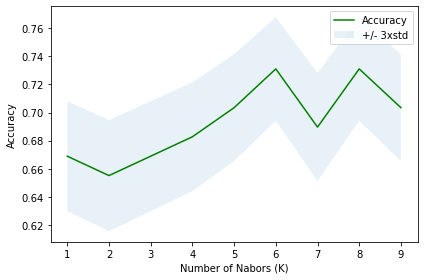

In [183]:
#K değerlerinin görselleştirilmesi
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc-1*std_acc,mean_acc+1*std_acc,alpha=0.10)
plt.legend(('Accuracy','+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show

In [184]:
classifier = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('accuracy degeri :', accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[ 4  1  7]
 [ 0 66 21]
 [ 1 15 30]]
accuracy degeri : 0.6896551724137931
              precision    recall  f1-score   support

           0       0.80      0.33      0.47        12
           1       0.80      0.76      0.78        87
           2       0.52      0.65      0.58        46

    accuracy                           0.69       145
   macro avg       0.71      0.58      0.61       145
weighted avg       0.71      0.69      0.69       145



In [185]:
print(np.mean(y_pred==y_test))

0.6896551724137931


In [186]:
print(classifier.score(X_test,y_test))

0.6896551724137931


In [187]:
#K-FOLD CROSS-VALIDATION
from sklearn.model_selection import cross_val_score
scores=cross_val_score(classifier,X_train,y_train, cv=10)
scores

array([0.65517241, 0.72413793, 0.63793103, 0.68965517, 0.68965517,
       0.63793103, 0.63793103, 0.72413793, 0.72413793, 0.70689655])

In [188]:
scores.mean()

0.6827586206896552

In [189]:
#2-LogisticRegression Algorithm
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression(max_iter=10000,random_state=0)
logr.fit(X_train,y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [190]:
y_pred=logr.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[11  0  1]
 [ 0 72 15]
 [ 0 17 29]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.81      0.83      0.82        87
           2       0.64      0.63      0.64        46

    accuracy                           0.77       145
   macro avg       0.82      0.79      0.80       145
weighted avg       0.77      0.77      0.77       145



In [191]:
print('accuracy degeri :', accuracy_score(y_test, y_pred))
print(y_test.shape,y_pred.shape)

accuracy degeri : 0.7724137931034483
(145,) (145,)


In [192]:
#K-FOLD CROSS-VALIDATION
from sklearn.model_selection import cross_val_score
scores=cross_val_score(logr,X_train,y_train, cv=10)
scores.mean()

0.7637931034482759

In [193]:
#3-Support Vector Machines Algorithm
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [194]:
y_pred=svc.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print('accuracy degeri :', accuracy_score(y_test, y_pred))
print(y_test.shape,y_pred.shape)
print(classification_report(y_test,y_pred))


accuracy degeri : 0.7862068965517242
(145,) (145,)
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.82      0.84      0.83        87
           2       0.67      0.65      0.66        46

    accuracy                           0.79       145
   macro avg       0.83      0.80      0.82       145
weighted avg       0.79      0.79      0.79       145



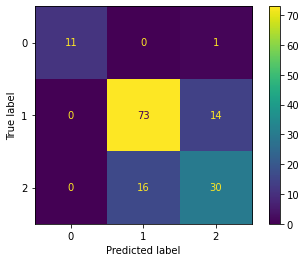

In [195]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svc.classes_)
disp.plot()
plt.show()

In [196]:
#K-FOLD CROSS-VALIDATION
from sklearn.model_selection import cross_val_score
scores=cross_val_score(svc,X_train,y_train, cv=10)
scores.mean()

0.7706896551724137

In [197]:
#4-GaussianNB algorithm
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

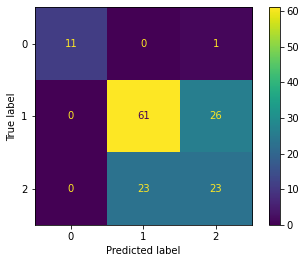

accuracy degeri : 0.6551724137931034
(145,) (145,)
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.73      0.70      0.71        87
           2       0.46      0.50      0.48        46

    accuracy                           0.66       145
   macro avg       0.73      0.71      0.72       145
weighted avg       0.66      0.66      0.66       145



In [198]:
y_pred=gnb.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gnb.classes_)
disp.plot()
plt.show()
print('accuracy degeri :', accuracy_score(y_test, y_pred))
print(y_test.shape,y_pred.shape)
print(classification_report(y_test,y_pred))

In [199]:
#K-FOLD CROSS-VALIDATION
from sklearn.model_selection import cross_val_score
scores=cross_val_score(gnb,X_train,y_train, cv=10)
scores
scores.mean()

0.7482758620689656

In [200]:
#5-DecisionTreeClassifier Algorithm
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='gini')
dtc.fit(X_train,y_train)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.73      0.70      0.71        87
           2       0.46      0.50      0.48        46

    accuracy                           0.66       145
   macro avg       0.73      0.71      0.72       145
weighted avg       0.66      0.66      0.66       145



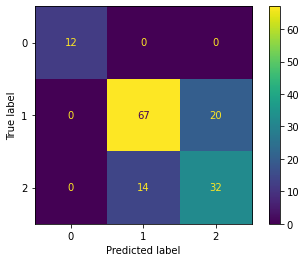

accuracy degeri : 0.7655172413793103
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.83      0.77      0.80        87
           2       0.62      0.70      0.65        46

    accuracy                           0.77       145
   macro avg       0.81      0.82      0.82       145
weighted avg       0.77      0.77      0.77       145



In [201]:
y_pred=dtc.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtc.classes_)
disp.plot()
plt.show()
print('accuracy degeri :', accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

In [202]:
#K-FOLD CROSS-VALIDATION
from sklearn.model_selection import cross_val_score
scores=cross_val_score(dtc,X_train,y_train, cv=10)
scores
scores.mean()

0.7724137931034484

In [203]:
#5-RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

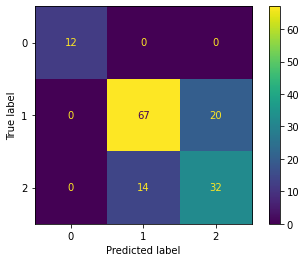

accuracy degeri : 0.7655172413793103
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.83      0.77      0.80        87
           2       0.62      0.70      0.65        46

    accuracy                           0.77       145
   macro avg       0.81      0.82      0.82       145
weighted avg       0.77      0.77      0.77       145



In [204]:
y_pred=dtc.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rfc.classes_)
disp.plot()
plt.show()
print('accuracy degeri :', accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

In [205]:
#K-FOLD CROSS-VALIDATION
from sklearn.model_selection import cross_val_score
scores=cross_val_score(rfc,X_train,y_train, cv=10)
scores
scores.mean()

0.7827586206896552